# Creating the Gene Table
This notebook is copied from the [Pymodulon GitHub repository](https://github.com/SBRG/pymodulon/blob/master/docs/tutorials/creating_the_gene_table.ipynb)

In [1]:
from pymodulon.gene_util import *
import os

## Get information from GFF files

First, download the FASTA and GFF files for your organism and its plasmids from NCBI.

Enter the location of all your GFF files here:

In [2]:
gff_files = [os.path.join('..','data','external','5G_genome_new.gff')]

The following cell will convert all the GFF files into a single Pandas DataFrame for easy manipulation. Pseudogenes have multiple rows in a GFF file (one for each fragment), but only the first fragment will be kept.

In [3]:
keep_cols = ['accession','start','end','strand','gene_name','old_locus_tag','gene_product','ncbi_protein']

DF_annot = gff2pandas(gff_files,index='locus_tag')
DF_annot = DF_annot[keep_cols]

DF_annot

,accession,start,end,strand,gene_name,old_locus_tag,gene_product,ncbi_protein
locus_tag,,,,,,,,
EQU24_RS00005,NZ_CP035467.1,1.0,1317.0,+,dnaA,EQU24_00005,chromosomal replication initiator protein DnaA,WP_017841472.1
EQU24_RS00010,NZ_CP035467.1,1503.0,2603.0,+,dnaN,EQU24_00010,DNA polymerase III subunit beta,WP_017841471.1
EQU24_RS00015,NZ_CP035467.1,3061.0,4140.0,+,recF,EQU24_00015,DNA replication/repair protein RecF,WP_017841470.1
EQU24_RS00020,NZ_CP035467.1,4186.0,6600.0,+,gyrB,EQU24_00020,DNA topoisomerase (ATP-hydrolyzing) subunit B,WP_017841469.1
EQU24_RS00035,NZ_CP035467.1,7351.0,7734.0,+,None,EQU24_00035,hypothetical protein,WP_014146528.1
...,...,...,...,...,...,...,...,...
EQU24_RS22135,NZ_CP035467.1,4994942.0,4996288.0,-,mnmE,EQU24_22115,tRNA uridine-5-carboxymethylaminomethyl(34) sy...,WP_017841475.1
EQU24_RS22140,NZ_CP035467.1,4996296.0,4997993.0,-,yidC,EQU24_22120,membrane protein insertase YidC,WP_017841474.1
EQU24_RS22145,NZ_CP035467.1,4997999.0,4998220.0,-,yidD,EQU24_22125,membrane protein insertion efficiency factor YidD,WP_083877753.1


In [4]:
# the gff is for some reason missing genes in the genbank, so I 
# will not use this file directly, as the iModulon folks do.
# But it does have some ncbi protein values and other gene names
# so I'll make a dict to transfer that over to my gene info file

# transfer ncbi proteins and some gene names over to gene_info
annot_dict = dict([(x,(y,z)) for x,y,z in DF_annot[['gene_name','ncbi_protein']].reset_index().values])
annot_dict

{'EQU24_RS00005': ('dnaA', 'WP_017841472.1'),
 'EQU24_RS00010': ('dnaN', 'WP_017841471.1'),
 'EQU24_RS00015': ('recF', 'WP_017841470.1'),
 'EQU24_RS00020': ('gyrB', 'WP_017841469.1'),
 'EQU24_RS00035': (None, 'WP_014146528.1'),
 'EQU24_RS00040': (None, 'WP_017841467.1'),
 'EQU24_RS00045': (None, 'WP_017841466.1'),
 'EQU24_RS00050': (None, 'WP_017841465.1'),
 'EQU24_RS00055': (None, 'WP_014146532.1'),
 'EQU24_RS00060': (None, 'WP_017841464.1'),
 'EQU24_RS22660': (None, 'WP_017841463.1'),
 'EQU24_RS00070': ('tatA', 'WP_014146537.1'),
 'EQU24_RS00075': ('tatB', 'WP_017841462.1'),
 'EQU24_RS00080': (None, 'WP_201764866.1'),
 'EQU24_RS00085': ('lgt', 'WP_017841459.1'),
 'EQU24_RS00090': ('thyA', 'WP_017841458.1'),
 'EQU24_RS00095': (None, 'WP_017841457.1'),
 'EQU24_RS00100': (None, 'WP_017841456.1'),
 'EQU24_RS00105': ('crp', 'WP_014146545.1'),
 'EQU24_RS00110': (None, 'WP_017841455.1'),
 'EQU24_RS00115': ('speD', 'WP_235726470.1'),
 'EQU24_RS22165': (None, 'WP_017841452.1'),
 'EQU24_RS0012

To ensure that the gene index used is identical to the expression matrix, load in your data.

In [5]:
log_tpm_file = os.path.join('..','data','5g_processed_data','log_norm_uMax_indiv.csv')
DF_log_tpm = pd.read_csv(log_tpm_file,index_col=0)
DF_log_tpm.head()

,5GB1_ferm_Ack_QC_tpm,5GB1_ferm_WT_QC_tpm,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,5GB1_FM12_TR2_QC_tpm,...,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm
locus_tag,,,,,,,,,,,,,,,,,,,,,
EQU24_RS00005,-4.135351,-3.097173,-0.081618,0.013543,-1.005473,-0.565908,-0.868240,-0.861181,-0.860286,-0.810841,...,-0.423331,-0.413887,-0.465584,-0.361508,-0.366746,-0.629039,-0.374679,-0.430905,-0.773416,-0.326023
EQU24_RS00010,-5.201540,-3.930131,-0.213951,-0.115316,-0.677320,-0.569877,-1.119576,-1.054664,-1.167149,-1.149678,...,-0.179590,-0.182090,-0.479849,-0.274384,-0.346861,-0.306024,-0.388553,-0.356148,-0.679766,-0.170025
EQU24_RS00015,-4.569572,-3.725040,0.002850,-0.174656,-0.639651,-0.279816,-1.029608,-1.120098,-1.028006,-0.996256,...,-0.110156,0.045097,-0.655508,-0.483245,-0.609796,-0.620538,-0.578460,-0.572416,-0.801799,-0.181680
EQU24_RS00020,-4.461081,-4.035474,-0.130356,0.040745,-0.414605,-0.346534,-0.941858,-0.957353,-0.913985,-0.980052,...,0.082403,0.193677,-0.363136,-0.123069,-0.244925,-0.128927,-0.032470,-0.106898,-0.295688,-0.049523
EQU24_RS00025,-4.950035,-3.637451,0.659048,0.404700,-0.031390,0.291903,-0.787794,-0.640604,-0.818610,-0.839456,...,0.087352,0.059120,-0.455537,-0.375085,-0.325837,-0.267183,-0.280655,-0.400990,-0.192058,-0.235679


In [6]:
gene_info_file = os.path.join('..','data','5g_processed_data','5g_gene_info.tsv')

DF_gene_info = pd.read_csv(gene_info_file,sep='\t').fillna("")
DF_gene_info

,locus_tag,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,gene_len,tu_name,tu_id
0,EQU24_RS00005,chromosomal replication initiator protein DnaA,CDS,dnaA,NZ_CP035467.1,0,1317,Derived by automated computational analysis us...,MSALWNNCLAKLENEISSSEFSTWIRPLQAIETDGQIKLLAPNRFV...,1318,dnaA,2831
1,EQU24_RS00010,DNA polymerase III subunit beta,CDS,,NZ_CP035467.1,1502,2603,Derived by automated computational analysis us...,MKYIINREQLLVPLQQIVSVIEKRQTMPILSNVLMVFRENTLVMTG...,1102,EQU24_RS00010,2830
2,EQU24_RS00015,DNA replication/repair protein RecF,CDS,recF,NZ_CP035467.1,3060,4140,Derived by automated computational analysis us...,MSLQKLDIFNVRNIRQASLQPSPGLNLIYGANASGKSSVLEAIFIL...,1081,recF,2829
3,EQU24_RS00020,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS,gyrB,NZ_CP035467.1,4185,6600,Derived by automated computational analysis us...,MSENIKQYDSTNIQVLKGLDAVRKRPGMYIGDTDDGTGLHHMVFEV...,2416,gyrB,2828
4,EQU24_RS00025,hypothetical protein,CDS,,NZ_CP035467.1,6825,7062,Derived by automated computational analysis us...,VKTTKYFLTTRMRPDREIIKDEWIQYVVRFPENEHIQFDGRIRRWA...,238,EQU24_RS00030 // EQU24_RS00025,2827
...,...,...,...,...,...,...,...,...,...,...,...,...
4208,EQU24_RS22135,tRNA uridine-5-carboxymethylaminomethyl(34) sy...,CDS,mnmE,NZ_CP035467.1,4994941,4996288,Derived by automated computational analysis us...,VDIGTNDTIAAIATPPGNGGVGIVRISGPAVSIIAAKLTDRPLPPR...,1348,rpmH // rnpA // yidD // yidC // mnmE,1
4209,EQU24_RS22140,membrane protein insertase YidC,CDS,yidC,NZ_CP035467.1,4996295,4997993,Derived by automated computational analysis us...,MDNIRFILVVTFAMLLYMLYDAWQIDYGPKREISVAQQMPQDLKED...,1699,rpmH // rnpA // yidD // yidC // mnmE,1
4210,EQU24_RS22145,membrane protein insertion efficiency factor YidD,CDS,yidD,NZ_CP035467.1,4997998,4998220,Derived by automated computational analysis us...,MRVLLIAIIKLYQYFISPLLGKNCRFYPSCSCYALEALHKHGAAQG...,223,rpmH // rnpA // yidD // yidC // mnmE,1
4211,EQU24_RS22150,ribonuclease P protein component,CDS,rnpA,NZ_CP035467.1,4998201,4998570,Derived by automated computational analysis us...,LTNKVFSFPPQLRLRKPSEYKKVFTGPVKSSDAYFTLLAVRNELDH...,370,rpmH // rnpA // yidD // yidC // mnmE,1


In [7]:
# add missing genes to annot dict and convert None to ''
for x in DF_gene_info.locus_tag:
    if x in annot_dict:
        if annot_dict[x][0] == None:
            annot_dict[x][0] == ''
    else:
        annot_dict[x] = ('','')

In [8]:
# transfer info from gff annotation to mine original
DF_gene_info['gene_name_extra'] = DF_gene_info.apply(lambda row: f"{row['gene_symbol']}||{annot_dict[row['locus_tag']][0]}",axis=1)
DF_gene_info['ncbi_protein'] = DF_gene_info['locus_tag'].apply(lambda x: annot_dict[x][1])

In [9]:
DF_gene_info.head()

,locus_tag,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,gene_len,tu_name,tu_id,gene_name_extra,ncbi_protein
0,EQU24_RS00005,chromosomal replication initiator protein DnaA,CDS,dnaA,NZ_CP035467.1,0,1317,Derived by automated computational analysis us...,MSALWNNCLAKLENEISSSEFSTWIRPLQAIETDGQIKLLAPNRFV...,1318,dnaA,2831,dnaA||dnaA,WP_017841472.1
1,EQU24_RS00010,DNA polymerase III subunit beta,CDS,,NZ_CP035467.1,1502,2603,Derived by automated computational analysis us...,MKYIINREQLLVPLQQIVSVIEKRQTMPILSNVLMVFRENTLVMTG...,1102,EQU24_RS00010,2830,||dnaN,WP_017841471.1
2,EQU24_RS00015,DNA replication/repair protein RecF,CDS,recF,NZ_CP035467.1,3060,4140,Derived by automated computational analysis us...,MSLQKLDIFNVRNIRQASLQPSPGLNLIYGANASGKSSVLEAIFIL...,1081,recF,2829,recF||recF,WP_017841470.1
3,EQU24_RS00020,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS,gyrB,NZ_CP035467.1,4185,6600,Derived by automated computational analysis us...,MSENIKQYDSTNIQVLKGLDAVRKRPGMYIGDTDDGTGLHHMVFEV...,2416,gyrB,2828,gyrB||gyrB,WP_017841469.1
4,EQU24_RS00025,hypothetical protein,CDS,,NZ_CP035467.1,6825,7062,Derived by automated computational analysis us...,VKTTKYFLTTRMRPDREIIKDEWIQYVVRFPENEHIQFDGRIRRWA...,238,EQU24_RS00030 // EQU24_RS00025,2827,||,


In [10]:
# annot is the wrong shape but the others match. I think
# this is the one that's import for me

print(DF_annot.shape)
print(DF_log_tpm.shape)
print(DF_gene_info.shape)

(4177, 8)
(4213, 98)
(4213, 14)


In [11]:
# which genes are missing from GFF vs the Genbank?
an = set(DF_annot.index)
ge = set(DF_gene_info.locus_tag)

In [12]:
print("number of genes in GFF, but not in Genbank:",len(an - ge))
list(an-ge)[:5]

number of genes in GFF, but not in Genbank: 233


['EQU24_RS22410',
 'EQU24_RS22350',
 'EQU24_RS22625',
 'EQU24_RS22275',
 'EQU24_RS03245']

In [13]:
# genes in GFF missing from Genbank seem to be pseudo genes
DF_annot[DF_annot.index =='EQU24_RS02925']

,accession,start,end,strand,gene_name,old_locus_tag,gene_product,ncbi_protein
locus_tag,,,,,,,,
EQU24_RS02925,NZ_CP035467.1,628258.0,628605.0,+,None,EQU24_02925,type II toxin-antitoxin system VapC family toxin,WP_017840935.1


In [14]:
print("number of genes in Genbank but not GFF:",len(ge-an))
list(ge-an)[:5]

number of genes in Genbank but not GFF: 269


['EQU24_RS05580',
 'EQU24_RS04980',
 'EQU24_RS17370',
 'EQU24_RS20660',
 'EQU24_RS04160']

In [15]:
DF_gene_info[DF_gene_info.locus_tag =='EQU24_RS19095']

,locus_tag,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,gene_len,tu_name,tu_id,gene_name_extra,ncbi_protein
3628,EQU24_RS19095,hypothetical protein,CDS,,NZ_CP035467.1,4273547,4273898,Derived by automated computational analysis us...,LHPSSNSQFGNQKGCGVCLARMSAAGADFCSSAIAELHGCNECRKC...,352,EQU24_RS19095,415,||,


In [16]:
# I'm not sure why these are missing from the GFF file *shrug*

Check that the genes are the same in the expression dataset as in the annotation dataframe. Mismatched genes are listed below.

In [17]:
## This test didn't work for me directly due to missing genes between
## Genbank and GFF

# test = DF_annot.sort_index().index == DF_log_tpm.sort_index().index
# DF_annot[~test]

## (Optional) KEGG and COGs

### Generate nucleotide fasta files for CDS

Enter the location of all your fasta files here:

In [18]:
#fasta_files = [os.path.join('..','data','external','genome.fasta')]

In [18]:
from Bio import SeqIO

# I needed this to get the strand
def get_feat2meta_dict(genbank_path):
    '''
    Given a genbank file, parse it and return a dictionary of locus and the 
    gene, product and type fields
    '''
    seq_record = SeqIO.parse(genbank_path, "genbank").__next__()
    feat_list = []
    # Loop over the genome file, get the features on each of the strands
    for feature in seq_record.features:
        if feature.type != 'gene': # exclude 'gene' wrapper type
            if 'locus_tag' in feature.qualifiers: # exclude features without a locus tag
                # get  locus tag, feature name and product
                lt = feature.qualifiers['locus_tag'][0]
                g = "" if 'gene' not in feature.qualifiers else feature.qualifiers['gene'][0]
                prod = "" if 'product' not in feature.qualifiers else feature.qualifiers['product'][0]
                t = feature.type
                strand = feature.strand

                metadata = {
                    'gene_symbol':g,
                    'product':prod,
                    'type':t,
                    'strand':strand
                }

                feat_list.append((lt,metadata))

    return dict(feat_list)

In [19]:
gb_file = os.path.join('..','data','external','5GB1c_sequence.gb')
feat_dict = get_feat2meta_dict(gb_file)

In [20]:
feat_dict

{'EQU24_RS00005': {'gene_symbol': 'dnaA',
  'product': 'chromosomal replication initiator protein DnaA',
  'type': 'CDS',
  'strand': 1},
 'EQU24_RS00010': {'gene_symbol': '',
  'product': 'DNA polymerase III subunit beta',
  'type': 'CDS',
  'strand': 1},
 'EQU24_RS00015': {'gene_symbol': 'recF',
  'product': 'DNA replication/repair protein RecF',
  'type': 'CDS',
  'strand': 1},
 'EQU24_RS00020': {'gene_symbol': 'gyrB',
  'product': 'DNA topoisomerase (ATP-hydrolyzing) subunit B',
  'type': 'CDS',
  'strand': 1},
 'EQU24_RS00025': {'gene_symbol': '',
  'product': 'hypothetical protein',
  'type': 'CDS',
  'strand': 1},
 'EQU24_RS00030': {'gene_symbol': '',
  'product': 'DUF2283 domain-containing protein',
  'type': 'CDS',
  'strand': 1},
 'EQU24_RS00035': {'gene_symbol': '',
  'product': 'hypothetical protein',
  'type': 'CDS',
  'strand': 1},
 'EQU24_RS00040': {'gene_symbol': '',
  'product': 'TolC family protein',
  'type': 'CDS',
  'strand': 1},
 'EQU24_RS00045': {'gene_symbol': '

In [21]:
DF_gene_info['strand'] = DF_gene_info['locus_tag'].apply(lambda x: feat_dict[x]['strand'])
DF_gene_info.head(20)

,locus_tag,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,gene_len,tu_name,tu_id,gene_name_extra,ncbi_protein,strand
0,EQU24_RS00005,chromosomal replication initiator protein DnaA,CDS,dnaA,NZ_CP035467.1,0,1317,Derived by automated computational analysis us...,MSALWNNCLAKLENEISSSEFSTWIRPLQAIETDGQIKLLAPNRFV...,1318,dnaA,2831,dnaA||dnaA,WP_017841472.1,1
1,EQU24_RS00010,DNA polymerase III subunit beta,CDS,,NZ_CP035467.1,1502,2603,Derived by automated computational analysis us...,MKYIINREQLLVPLQQIVSVIEKRQTMPILSNVLMVFRENTLVMTG...,1102,EQU24_RS00010,2830,||dnaN,WP_017841471.1,1
2,EQU24_RS00015,DNA replication/repair protein RecF,CDS,recF,NZ_CP035467.1,3060,4140,Derived by automated computational analysis us...,MSLQKLDIFNVRNIRQASLQPSPGLNLIYGANASGKSSVLEAIFIL...,1081,recF,2829,recF||recF,WP_017841470.1,1
3,EQU24_RS00020,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS,gyrB,NZ_CP035467.1,4185,6600,Derived by automated computational analysis us...,MSENIKQYDSTNIQVLKGLDAVRKRPGMYIGDTDDGTGLHHMVFEV...,2416,gyrB,2828,gyrB||gyrB,WP_017841469.1,1
4,EQU24_RS00025,hypothetical protein,CDS,,NZ_CP035467.1,6825,7062,Derived by automated computational analysis us...,VKTTKYFLTTRMRPDREIIKDEWIQYVVRFPENEHIQFDGRIRRWA...,238,EQU24_RS00030 // EQU24_RS00025,2827,||,,1
5,EQU24_RS00030,DUF2283 domain-containing protein,CDS,,NZ_CP035467.1,7098,7257,Derived by automated computational analysis us...,IEFRSSGIVESKDLDENTIIDVDAQGNVCAMTFEHASQRTDVNHLI...,160,EQU24_RS00030 // EQU24_RS00025,2827,||,,1
6,EQU24_RS00035,hypothetical protein,CDS,,NZ_CP035467.1,7350,7734,Derived by automated computational analysis us...,MSTPFKTALVIFLVILQSIAPLVHAHPMVDELSDGVHMPGFEQFNA...,385,EQU24_RS00035,2826,||None,WP_014146528.1,1
7,EQU24_RS00040,TolC family protein,CDS,,NZ_CP035467.1,7818,9075,Derived by automated computational analysis us...,MIPLKPLKGALLCCCLLSTFVVWADSEMIVDHFDPIEVEPTMTLAG...,1258,EQU24_RS00055 // EQU24_RS00050 // EQU24_RS0004...,2825,||None,WP_017841467.1,1
8,EQU24_RS00045,efflux RND transporter periplasmic adaptor sub...,CDS,,NZ_CP035467.1,9071,10241,Derived by automated computational analysis us...,MKRILLSVWAGLFVLQASNNSWAANACEVVGADTAQENHCSPVSAQ...,1171,EQU24_RS00055 // EQU24_RS00050 // EQU24_RS0004...,2825,||None,WP_017841466.1,1
9,EQU24_RS00050,efflux RND transporter permease subunit,CDS,,NZ_CP035467.1,10240,13306,Derived by automated computational analysis us...,MGHLIRFALAQRILIVLFVLLLAGGGWYAWQRIPIDAFPEVSPTQV...,3067,EQU24_RS00055 // EQU24_RS00050 // EQU24_RS0004...,2825,||None,WP_017841465.1,1


The following code generates CDS files using your FASTA and GFF3 files

In [22]:
# from Bio import SeqIO

# cds_list = []
# for fasta in fasta_files:
#     seq = SeqIO.read(fasta,'fasta')

#     # Get gene information for genes in this fasta file
#     df_genes = DF_annot[DF_annot.accession == seq.id]
    
#     for i,row in df_genes.iterrows():
#         cds = seq[row.start-1:row.end]
#         if row.strand == '-':
#             cds = seq[row.start-1:row.end].reverse_complement()
#         cds.id = row.name
#         cds.description = row.gene_name if pd.notnull(row.gene_name) else row.name
#         cds_list.append(cds)


fasta_file = os.path.join('..','data','external','5G_genome_new.fa')
cds_list = []
seq = SeqIO.read(fasta_file,'fasta')

# Get gene information for genes in this fasta file

for i,row in DF_gene_info.iterrows():
    cds = seq[row.start_coord:row.end_coord]
    if row.strand == -1:
        #print('reversing.....')
        cds = cds.reverse_complement()
    cds.id = str(row.locus_tag)
    #cds.description = row.gene_symbol if row.gene_symbol != '' else row.locus_tag
    cds.description = f"{row.locus_tag}|{row.gene_symbol}|{row['product']}"
    cds_list.append(cds)

In [23]:
cds_list[14]

SeqRecord(seq=Seq('ATGTTCGATATCGGTTTTACCGAACTGTGCATGATCGGTTTGGTCGCATTGTTG...TGA'), id='EQU24_RS00075', name='NZ_CP035467.1', description='EQU24_RS00075|tatB|twin-arginine translocase subunit TatB', dbxrefs=[])

Save the CDS file

In [28]:
cds_file = os.path.join('..','data','external','5G_CDS.fa')
SeqIO.write(cds_list, cds_file, 'fasta')

4213

### Run EggNOG Mapper
1. Go to http://eggnog-mapper.embl.de/.
1. Upload the CDS.fna file from your organism directory (within the sequence_files folder)
1. Make sure to limit the taxonomy to the correct level
1. After the job is submitted, you must follow the link in your email to run the job.
1. Once the job completes (after ~4 hrs), download the annotations file.
1. Save the annotation file

### Get KEGG IDs

Once you have the EggNOG annotations, load the annotation file

In [22]:
eggnog_fileg = os.path.join('..','data','external','5G_eggnog_annotations_gamma.tsv')
eggnog_fileb = os.path.join('..','data','external','5G_eggnog_annotations_bact.tsv')

In [23]:
DF_eggnog_g = pd.read_csv(eggnog_fileg,sep='\t',skiprows=5,header=None)
DF_eggnog_b = pd.read_csv(eggnog_fileb,sep='\t',skiprows=5,header=None)
# eggnog_cols = ['query_name','seed eggNOG ortholog','seed ortholog evalue','seed ortholog score',
#                'Predicted taxonomic group','Predicted protein name','Gene Ontology terms',
#                'EC number','KEGG_orth','KEGG_pathway','KEGG_module','KEGG_reaction',
#                'KEGG_rclass','BRITE','KEGG_TC','CAZy','BiGG Reaction','tax_scope',
#                'eggNOG OGs','bestOG_deprecated','COG','eggNOG free text description']
eggnog_cols = ['query_name','seed_ortholog','evalue','seed_ortholog_score',
               'eggNOG OGs', 'max_annot_lvl','COG_category','desc','preferred_name',
               'GOs','EC','KEGG_ko','KEGG_pathway','KEGG_module','KEGG_reaction',
               'KEGG_rclass','BRITE','KEGG_TC','CAZy','BiGG_Reaction','pFAMs']

DF_eggnog_g.columns = eggnog_cols
DF_eggnog_b.columns = eggnog_cols

# Strip last three rows as they are comments
DF_eggnog_g = DF_eggnog_g.iloc[:-3]
DF_eggnog_b = DF_eggnog_b.iloc[:-3]

# Set locus tag as index
DF_eggnog_g = DF_eggnog_g.set_index('query_name')
DF_eggnog_g.index.name = 'locus_tag'

DF_eggnog_b = DF_eggnog_b.set_index('query_name')
DF_eggnog_b.index.name = 'locus_tag'

In [24]:
print(DF_eggnog_g.shape)
print(DF_eggnog_b.shape)

(3023, 20)
(3625, 20)


In [25]:
# the "bacteria" one has more entries than the "gammaproteobacteria" one, so go with that for now
DF_eggnog = DF_eggnog_b

In [26]:
DF_eggnog.columns

Index(['seed_ortholog', 'evalue', 'seed_ortholog_score', 'eggNOG OGs',
       'max_annot_lvl', 'COG_category', 'desc', 'preferred_name', 'GOs', 'EC',
       'KEGG_ko', 'KEGG_pathway', 'KEGG_module', 'KEGG_reaction',
       'KEGG_rclass', 'BRITE', 'KEGG_TC', 'CAZy', 'BiGG_Reaction', 'pFAMs'],
      dtype='object')

Now we will pull the KEGG information from the eggNOG file, including orthology, pathway, module, and reactions for each gene.

In [27]:
DF_kegg = DF_eggnog[['KEGG_ko','KEGG_pathway','KEGG_module','KEGG_reaction']]

# Melt dataframe
DF_kegg = DF_kegg.reset_index().melt(id_vars='locus_tag') 

# Remove null values
DF_kegg = DF_kegg[DF_kegg.value != '-']

# Split comma-separated values into their own rows
list2struct = []
for name,row in DF_kegg.iterrows():
    for val in row.value.split(','):
        list2struct.append([row.locus_tag,row.variable,val])

DF_kegg = pd.DataFrame(list2struct,columns=['gene_id','database','kegg_id'])

# Remove ko entries, as only map entries are searchable in KEGG pathway
DF_kegg = DF_kegg[~DF_kegg.kegg_id.str.startswith('ko')]

DF_kegg.head()

,gene_id,database,kegg_id
3758,EQU24_RS00005,KEGG_pathway,map02020
3759,EQU24_RS00005,KEGG_pathway,map04112
3766,EQU24_RS00010,KEGG_pathway,map00230
3767,EQU24_RS00010,KEGG_pathway,map00240
3768,EQU24_RS00010,KEGG_pathway,map01100


In [28]:
DF_kegg.database.unique()

array(['KEGG_pathway', 'KEGG_module', 'KEGG_reaction'], dtype=object)

### Save KEGG information

In [31]:
DF_kegg.to_csv(os.path.join('..','data','external','5G_kegg_mapping.csv'))

### Save COGs to annotation dataframe

In [29]:
egg2cog = dict(DF_eggnog['COG_category'].reset_index().values)
egg2cog

{'EQU24_RS00005': 'L',
 'EQU24_RS00010': 'L',
 'EQU24_RS00015': 'L',
 'EQU24_RS00020': 'L',
 'EQU24_RS00025': '-',
 'EQU24_RS00030': 'S',
 'EQU24_RS00040': 'MU',
 'EQU24_RS00045': 'M',
 'EQU24_RS00050': 'P',
 'EQU24_RS00055': 'S',
 'EQU24_RS00060': 'T',
 'EQU24_RS00065': 'S',
 'EQU24_RS00070': 'U',
 'EQU24_RS00075': 'U',
 'EQU24_RS00080': 'O',
 'EQU24_RS00085': 'M',
 'EQU24_RS00090': 'F',
 'EQU24_RS00095': '-',
 'EQU24_RS00100': 'S',
 'EQU24_RS00105': 'K',
 'EQU24_RS00110': 'O',
 'EQU24_RS00115': 'E',
 'EQU24_RS00125': 'S',
 'EQU24_RS00135': 'S',
 'EQU24_RS00140': 'M',
 'EQU24_RS00145': 'J',
 'EQU24_RS00150': 'M',
 'EQU24_RS00170': 'S',
 'EQU24_RS00175': 'L',
 'EQU24_RS00180': 'L',
 'EQU24_RS00185': 'L',
 'EQU24_RS00195': 'L',
 'EQU24_RS00205': 'L',
 'EQU24_RS00210': '-',
 'EQU24_RS00215': 'N',
 'EQU24_RS00220': 'N',
 'EQU24_RS00225': 'G',
 'EQU24_RS00245': 'P',
 'EQU24_RS00265': 'M',
 'EQU24_RS00270': 'T',
 'EQU24_RS00280': 'T',
 'EQU24_RS00285': 'KLT',
 'EQU24_RS00290': '-',
 'EQU24_

In [30]:
DF_eggnog['COG_category'].unique()

array(['L', '-', 'S', 'MU', 'M', 'P', 'T', 'U', 'O', 'F', 'K', 'E', 'J',
       'N', 'G', 'KLT', 'GM', 'H', 'IQ', 'I', 'FJ', 'C', 'V', 'Q', 'NU',
       'D', 'EH', 'KT', 'KL', 'OU', 'AJ', 'PT', 'MP', 'JKL', 'EG', 'IM',
       'NT', 'HO', 'NOU', 'EGP', 'CH', 'TV', 'HJ', 'CO', 'BQ', 'FP', 'OT',
       'DJ', 'GK', 'FG', 'EQ', 'KO', 'QT', 'DM', 'PQ', 'A', 'CU', 'JM',
       'ET', 'CI', 'HL', 'LM', 'CG', 'EJ', 'EP'], dtype=object)

In [31]:
# DF_annot['COG'] = DF_eggnog.COG

# # Make sure COG only has one entry per gene
# DF_annot['COG'] = [item[0] if isinstance(item,str) else item for item in DF_annot['COG']]


DF_gene_info['COG'] = DF_gene_info['locus_tag'].apply(lambda x: egg2cog[x] if x in egg2cog else '-')

# Make sure COG only has one entry per gene
# Why is it important to only have 1??
DF_gene_info['COG'] = [item[0] if isinstance(item,str) else item for item in DF_gene_info['COG']]

In [32]:
DF_gene_info['COG'].unique()

array(['L', '-', 'S', 'M', 'P', 'T', 'U', 'O', 'F', 'K', 'E', 'J', 'N',
       'G', 'H', 'I', 'C', 'V', 'Q', 'D', 'A', 'B'], dtype=object)

In [35]:
DF_gene_info['cog_name'] = DF_gene_info['COG'].apply(lambda x: cog2str(x) if x != '-' else '')
DF_gene_info.head()

,locus_tag,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,gene_len,tu_name,tu_id,gene_name_extra,ncbi_protein,strand,COG,cog_name
0,EQU24_RS00005,chromosomal replication initiator protein DnaA,CDS,dnaA,NZ_CP035467.1,0,1317,Derived by automated computational analysis us...,MSALWNNCLAKLENEISSSEFSTWIRPLQAIETDGQIKLLAPNRFV...,1318,dnaA,2831,dnaA||dnaA,WP_017841472.1,1,L,"Replication, recombination and repair"
1,EQU24_RS00010,DNA polymerase III subunit beta,CDS,,NZ_CP035467.1,1502,2603,Derived by automated computational analysis us...,MKYIINREQLLVPLQQIVSVIEKRQTMPILSNVLMVFRENTLVMTG...,1102,EQU24_RS00010,2830,||dnaN,WP_017841471.1,1,L,"Replication, recombination and repair"
2,EQU24_RS00015,DNA replication/repair protein RecF,CDS,recF,NZ_CP035467.1,3060,4140,Derived by automated computational analysis us...,MSLQKLDIFNVRNIRQASLQPSPGLNLIYGANASGKSSVLEAIFIL...,1081,recF,2829,recF||recF,WP_017841470.1,1,L,"Replication, recombination and repair"
3,EQU24_RS00020,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS,gyrB,NZ_CP035467.1,4185,6600,Derived by automated computational analysis us...,MSENIKQYDSTNIQVLKGLDAVRKRPGMYIGDTDDGTGLHHMVFEV...,2416,gyrB,2828,gyrB||gyrB,WP_017841469.1,1,L,"Replication, recombination and repair"
4,EQU24_RS00025,hypothetical protein,CDS,,NZ_CP035467.1,6825,7062,Derived by automated computational analysis us...,VKTTKYFLTTRMRPDREIIKDEWIQYVVRFPENEHIQFDGRIRRWA...,238,EQU24_RS00030 // EQU24_RS00025,2827,||,,1,-,


In [34]:
cog2str

'RNA processing and modification'

## Uniprot ID mapping

The ``uniprot_id_mapping`` function is a python wrapper for the [Uniprot ID mapping tool](https://www.uniprot.org/uploadlists/). Use ``input_id=P_REFSEQ_AC`` if the FASTA/GFF files are from RefSeq, and ``input_id=EMBL`` if the files are from Genbank.

In [36]:
mapping_uniprot = uniprot_id_mapping(DF_gene_info.ncbi_protein.fillna(''),input_id='P_REFSEQ_AC',output_id='ACC',
                             input_name='ncbi_protein',output_name='uniprot')
mapping_uniprot.head()

,ncbi_protein,uniprot
3253,WP_017842117.1,A0A3F2YLY8
6,WP_017841467.1,A0A4P9UI68
18,WP_017841457.1,A0A4P9UI81
3,WP_017841469.1,A0A4P9UI83
30,WP_017841447.1,A0A4P9UI88


In [37]:
ncbi2uni = dict(mapping_uniprot.values)

In [38]:
# Merge with current annotation
# DF_annot = pd.merge(DF_annot.reset_index(),mapping_uniprot,how='left',on='ncbi_protein')
# DF_annot.set_index('locus_tag',inplace=True)
# DF_annot.head()

In [39]:
DF_gene_info['uniprot'] = DF_gene_info['ncbi_protein'].apply(lambda x: ncbi2uni[x] if x in ncbi2uni else "")
DF_gene_info

,locus_tag,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,gene_len,tu_name,tu_id,gene_name_extra,ncbi_protein,strand,COG,cog_name,uniprot
0,EQU24_RS00005,chromosomal replication initiator protein DnaA,CDS,dnaA,NZ_CP035467.1,0,1317,Derived by automated computational analysis us...,MSALWNNCLAKLENEISSSEFSTWIRPLQAIETDGQIKLLAPNRFV...,1318,dnaA,2831,dnaA||dnaA,WP_017841472.1,1,L,"Replication, recombination and repair",A0A4P9UMW3
1,EQU24_RS00010,DNA polymerase III subunit beta,CDS,,NZ_CP035467.1,1502,2603,Derived by automated computational analysis us...,MKYIINREQLLVPLQQIVSVIEKRQTMPILSNVLMVFRENTLVMTG...,1102,EQU24_RS00010,2830,||dnaN,WP_017841471.1,1,L,"Replication, recombination and repair",A0A4P9UIN3
2,EQU24_RS00015,DNA replication/repair protein RecF,CDS,recF,NZ_CP035467.1,3060,4140,Derived by automated computational analysis us...,MSLQKLDIFNVRNIRQASLQPSPGLNLIYGANASGKSSVLEAIFIL...,1081,recF,2829,recF||recF,WP_017841470.1,1,L,"Replication, recombination and repair",A0A4P9UIH3
3,EQU24_RS00020,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS,gyrB,NZ_CP035467.1,4185,6600,Derived by automated computational analysis us...,MSENIKQYDSTNIQVLKGLDAVRKRPGMYIGDTDDGTGLHHMVFEV...,2416,gyrB,2828,gyrB||gyrB,WP_017841469.1,1,L,"Replication, recombination and repair",A0A4P9UI83
4,EQU24_RS00025,hypothetical protein,CDS,,NZ_CP035467.1,6825,7062,Derived by automated computational analysis us...,VKTTKYFLTTRMRPDREIIKDEWIQYVVRFPENEHIQFDGRIRRWA...,238,EQU24_RS00030 // EQU24_RS00025,2827,||,,1,-,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,EQU24_RS22135,tRNA uridine-5-carboxymethylaminomethyl(34) sy...,CDS,mnmE,NZ_CP035467.1,4994941,4996288,Derived by automated computational analysis us...,VDIGTNDTIAAIATPPGNGGVGIVRISGPAVSIIAAKLTDRPLPPR...,1348,rpmH // rnpA // yidD // yidC // mnmE,1,mnmE||mnmE,WP_017841475.1,-1,J,"Translation, ribosomal structure and biogenesis",A0A4P9USW8
4209,EQU24_RS22140,membrane protein insertase YidC,CDS,yidC,NZ_CP035467.1,4996295,4997993,Derived by automated computational analysis us...,MDNIRFILVVTFAMLLYMLYDAWQIDYGPKREISVAQQMPQDLKED...,1699,rpmH // rnpA // yidD // yidC // mnmE,1,yidC||yidC,WP_017841474.1,-1,U,"Intracellular trafficking, secretion, and vesi...",A0A4V1IKE6
4210,EQU24_RS22145,membrane protein insertion efficiency factor YidD,CDS,yidD,NZ_CP035467.1,4997998,4998220,Derived by automated computational analysis us...,MRVLLIAIIKLYQYFISPLLGKNCRFYPSCSCYALEALHKHGAAQG...,223,rpmH // rnpA // yidD // yidC // mnmE,1,yidD||yidD,WP_083877753.1,-1,S,Function unknown,UPI000A004C04
4211,EQU24_RS22150,ribonuclease P protein component,CDS,rnpA,NZ_CP035467.1,4998201,4998570,Derived by automated computational analysis us...,LTNKVFSFPPQLRLRKPSEYKKVFTGPVKSSDAYFTLLAVRNELDH...,370,rpmH // rnpA // yidD // yidC // mnmE,1,rnpA||rnpA,WP_017841473.1,-1,J,"Translation, ribosomal structure and biogenesis",A0A4P9UT31


In [146]:
# Erin: I already did these operon steps separately??

## Add Biocyc Operon information

To obtain operon information from Biocyc, follow the steps below

1. Go to [Biocyc.org](https://biocyc.org/) (you may need to create an account and/or login)
2. Change the organism database to your organism/strain
3. Select **SmartTables** -> **Special SmartTables**
4. Select **"All genes of \<organism\>"**
5. Select the **"Gene Name"** column
6. Under **"ADD TRANSFORM COLUMN"** select **"Genes in same transcription unit"**
7. Select the **"Genes in same transcription unit"** column
8. Under **"ADD PROPERTY COLUMN"** select **"Accession-1"**
9. Under **OPERATIONS**, select **"Export"** -> **"to Spreadsheet File..."**
10. Select **"common names"** and click **"Export smarttable"**
11. Add file location below and run the code cell

In [40]:
# biocyc_file = os.path.join('..','data','external','biocyc_annotations.txt')

# DF_biocyc = pd.read_csv(biocyc_file,sep='\t')

# # Remove genes with no accession
# DF_biocyc = DF_biocyc[DF_biocyc['Accession-1'].notnull()]

# # Set the accession (i.e. locus tag) as index
# DF_biocyc = DF_biocyc.set_index('Accession-1').sort_values('Left-End-Position')

# # Specific for B. subtilis: Fix locus tags
# DF_biocyc.index = DF_biocyc.index.str.replace('BSU','BSU_')

# # Only keep genes in the final annotation file
# DF_biocyc = DF_biocyc.reindex(DF_annot.index)

# # Reformat transcription units
# DF_biocyc['operon_list'] = DF_biocyc['Accession-1.1'].apply(reformat_biocyc_tu)

# # Fill None with locus tags
# DF_biocyc['operon_list'].fillna(DF_biocyc.index.to_series(), inplace=True)

# DF_biocyc.head()

### Assign unique IDs to operons

The following code assigns unique names to each operon

In [41]:
# # Get all operons
# operons = DF_biocyc['operon_list'].unique()

# # Map each operon to a unique string
# operon_dict = {operon: "Op"+str(i) for i, operon in enumerate(operons)}

# # Add names to dataframe
# DF_biocyc['operon'] = [operon_dict[op] for op in DF_biocyc["operon_list"]]

# DF_biocyc.head()

Finally, merge the Biocyc information with the main annotation DataFrame

In [42]:
# DF_annot['operon'] = DF_biocyc['operon']

## Clean up and save annotation

First, we will re-order the annotation columns

In [43]:
# if 'old_locus_tag' in DF_annot.columns:
#     order = ['gene_name','accession','old_locus_tag','start','end','strand','gene_product','COG','uniprot','operon']
# else:
#     order = ['gene_name','accession','start','end','strand','gene_product','COG','uniprot','operon']
    
# DF_annot = DF_annot[order]

if 'old_locus_tag' in DF_gene_info.columns:
    order = ['locus_tag','old_locus_tag','gene_symbol','start_coord','end_coord','strand','product','COG','cog_name','uniprot','tu_id','tu_name','ncbi_protein','gene_name_extra']
else:
    order = ['locus_tag','gene_symbol','start_coord','end_coord','strand','product','COG','cog_name','uniprot','tu_id','tu_name','ncbi_protein','gene_name_extra']
    
DF_gene_info = DF_gene_info[order]

In [44]:
DF_gene_info.columns

Index(['locus_tag', 'gene_symbol', 'start_coord', 'end_coord', 'strand',
       'product', 'COG', 'cog_name', 'uniprot', 'tu_id', 'tu_name',
       'ncbi_protein', 'gene_name_extra'],
      dtype='object')

In [45]:
DF_gene_info.head()

,locus_tag,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra
0,EQU24_RS00005,dnaA,0,1317,1,chromosomal replication initiator protein DnaA,L,"Replication, recombination and repair",A0A4P9UMW3,2831,dnaA,WP_017841472.1,dnaA||dnaA
1,EQU24_RS00010,,1502,2603,1,DNA polymerase III subunit beta,L,"Replication, recombination and repair",A0A4P9UIN3,2830,EQU24_RS00010,WP_017841471.1,||dnaN
2,EQU24_RS00015,recF,3060,4140,1,DNA replication/repair protein RecF,L,"Replication, recombination and repair",A0A4P9UIH3,2829,recF,WP_017841470.1,recF||recF
3,EQU24_RS00020,gyrB,4185,6600,1,DNA topoisomerase (ATP-hydrolyzing) subunit B,L,"Replication, recombination and repair",A0A4P9UI83,2828,gyrB,WP_017841469.1,gyrB||gyrB
4,EQU24_RS00025,,6825,7062,1,hypothetical protein,-,,,2827,EQU24_RS00030 // EQU24_RS00025,,||


## Final statistics

The following graphs show how much information is available for the organism.

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set_style('ticks')

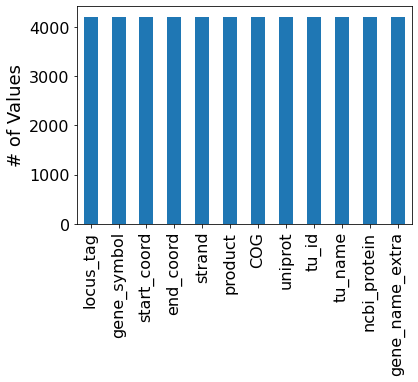

In [59]:
fig,ax = plt.subplots()
DF_gene_info.count().plot(kind='bar',ax=ax)
ax.set_ylabel('# of Values',fontsize=18)
ax.tick_params(labelsize=16)

## Fill missing values

Some organisms are missing gene names, so these will be filled with locus tag gene names.

In [19]:
# Fill in missing gene names with locus tag names
DF_annot['tmp_name'] = DF_annot.copy().index.tolist()
DF_annot.gene_name.fillna(DF_annot.tmp_name,inplace=True)
DF_annot.drop('tmp_name',axis=1,inplace=True)

In [47]:
import matplotlib.pyplot as plt

 COG letters will also be converted to the full name.

/home/ewilson6/anaconda3/envs/modulome/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/ewilson6/anaconda3/envs/modulome/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


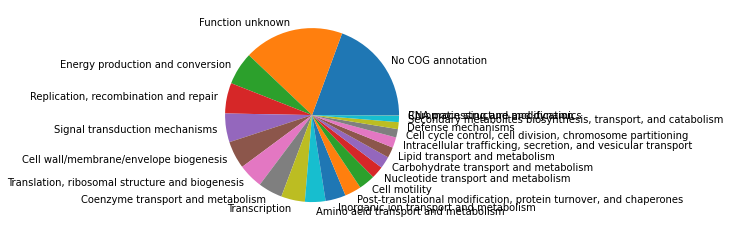

In [49]:
# # Fill missing COGs with X
# DF_annot['COG'].fillna('X',inplace=True)

# # Change single letter COG annotation to full description
# DF_annot['COG'] = DF_annot.COG.apply(cog2str)

# counts = DF_annot.COG.value_counts()
# plt.pie(counts.values,labels=counts.index);


# Fill missing COGs with X
DF_gene_info['COG'] = DF_gene_info['COG'].apply(lambda x: 'X' if x=='-' else x)

# Change single letter COG annotation to full description
DF_gene_info['cog_name'] = DF_gene_info.COG.apply(cog2str)

counts = DF_gene_info.cog_name.value_counts()
plt.pie(counts.values,labels=counts.index);


## Override some gene names

In [72]:
[x for x in DF_gene_info['gene_symbol'].values if "mxa" in x]

['mxaL', 'mxaK', 'mxaC', 'mxaA', 'mxaS', 'mxaP', 'mxaB', 'mxaD']

In [65]:
from override import GENE_NAME_OVERRIDE, GENE_PRODUCT_OVERRIDE

In [69]:
def get_override_gene(locus_tag,cur_gene):
    '''
    Given a locus tag, return an overridden gene
    '''
    return GENE_NAME_OVERRIDE[locus_tag] if locus_tag in GENE_NAME_OVERRIDE else cur_gene

def get_override_product(locus_tag,cur_prod):
    '''
    Given a locus tag, return an overridden gene
    '''
    return GENE_PRODUCT_OVERRIDE[locus_tag] if locus_tag in GENE_PRODUCT_OVERRIDE else cur_prod


In [70]:
DF_gene_info['gene_symbol'] = DF_gene_info.apply(lambda row: get_override_gene(row['locus_tag'],row['gene_symbol']),axis=1)
DF_gene_info['product'] = DF_gene_info.apply(lambda row: get_override_product(row['locus_tag'],row['product']),axis=1)

/home/ewilson6/anaconda3/envs/modulome/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ewilson6/anaconda3/envs/modulome/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
[x for x in DF_gene_info['gene_symbol'].values if "pmo" in x]

['pmoB', 'pmoA', 'pmoC']

Uncomment the following line to save the gene annotation dataset

In [74]:
DF_gene_info.to_csv(os.path.join('..','data','5g_processed_data','5G_gene_info3.csv'),index=False)

In [75]:
DF_gene_info

,locus_tag,gene_symbol,start_coord,end_coord,strand,product,COG,cog_name,uniprot,tu_id,tu_name,ncbi_protein,gene_name_extra
0,EQU24_RS00005,dnaA,0,1317,1,chromosomal replication initiator protein DnaA,L,"Replication, recombination and repair",A0A4P9UMW3,2831,dnaA,WP_017841472.1,dnaA||dnaA
1,EQU24_RS00010,,1502,2603,1,DNA polymerase III subunit beta,L,"Replication, recombination and repair",A0A4P9UIN3,2830,EQU24_RS00010,WP_017841471.1,||dnaN
2,EQU24_RS00015,recF,3060,4140,1,DNA replication/repair protein RecF,L,"Replication, recombination and repair",A0A4P9UIH3,2829,recF,WP_017841470.1,recF||recF
3,EQU24_RS00020,gyrB,4185,6600,1,DNA topoisomerase (ATP-hydrolyzing) subunit B,L,"Replication, recombination and repair",A0A4P9UI83,2828,gyrB,WP_017841469.1,gyrB||gyrB
4,EQU24_RS00025,,6825,7062,1,hypothetical protein,X,No COG annotation,,2827,EQU24_RS00030 // EQU24_RS00025,,||
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,EQU24_RS22135,mnmE,4994941,4996288,-1,tRNA uridine-5-carboxymethylaminomethyl(34) sy...,J,"Translation, ribosomal structure and biogenesis",A0A4P9USW8,1,rpmH // rnpA // yidD // yidC // mnmE,WP_017841475.1,mnmE||mnmE
4209,EQU24_RS22140,yidC,4996295,4997993,-1,membrane protein insertase YidC,U,"Intracellular trafficking, secretion, and vesi...",A0A4V1IKE6,1,rpmH // rnpA // yidD // yidC // mnmE,WP_017841474.1,yidC||yidC
4210,EQU24_RS22145,yidD,4997998,4998220,-1,membrane protein insertion efficiency factor YidD,S,Function unknown,UPI000A004C04,1,rpmH // rnpA // yidD // yidC // mnmE,WP_083877753.1,yidD||yidD
4211,EQU24_RS22150,rnpA,4998201,4998570,-1,ribonuclease P protein component,J,"Translation, ribosomal structure and biogenesis",A0A4P9UT31,1,rpmH // rnpA // yidD // yidC // mnmE,WP_017841473.1,rnpA||rnpA


## GO Annotations

To start, download the GO Annotations for your organism from AmiGO 2

1. Go to [AmiGO 2](http://amigo.geneontology.org/amigo/search/annotation)
1. Filter for your organism
1. Click ``CustomDL``
1. Drag ``GO class (direct)`` to the end of your Selected Fields
1. Enter the location of your GO annotation file below and run the following code block

In [4]:
go_file = os.path.join('..','data','external','GO_annotations.txt')

In [5]:
DF_GO = pd.read_csv(go_file,sep='\t',header=None,usecols=[2,17])
DF_GO.columns = ['gene_name','gene_ontology']
DF_GO.head()

,gene_name,gene_ontology
0,flhA,plasma membrane
1,flhA,bacterial-type flagellum assembly
2,glpP,"transcription antitermination factor activity,..."
3,rpsK,translation
4,rpsK,small ribosomal subunit rRNA binding


Convert the gene names to gene locus tags, and drop gene names that cannot be converted

In [23]:
name2num = {v:k for k,v in DF_annot.gene_name.to_dict().items()}

In [24]:
name2num

{'dnaA': 'BSU_00010',
 'dnaN': 'BSU_00020',
 'rlbA': 'BSU_00030',
 'recF': 'BSU_00040',
 'remB': 'BSU_00050',
 'gyrB': 'BSU_00060',
 'gyrA': 'BSU_00070',
 'yaaC': 'BSU_00080',
 'guaB': 'BSU_00090',
 'dacA': 'BSU_00100',
 'pdxS': 'BSU_00110',
 'pdxT': 'BSU_00120',
 'serS': 'BSU_00130',
 'dck': 'BSU_00140',
 'dgk': 'BSU_00150',
 'sleL': 'BSU_00160',
 'yaaI': 'BSU_00170',
 'tadA': 'BSU_00180',
 'dnaX': 'BSU_00190',
 'ebfC': 'BSU_00200',
 'recR': 'BSU_00210',
 'yaaL': 'BSU_00220',
 'bofA': 'BSU_00230',
 'csfB': 'BSU_00240',
 'xpaC': 'BSU_00250',
 'yaaN': 'BSU_00260',
 'yaaO': 'BSU_00270',
 'tmk': 'BSU_00280',
 'darA': 'BSU_00290',
 'yaaR': 'BSU_00300',
 'holB': 'BSU_00310',
 'ricT': 'BSU_00320',
 'dnaH': 'BSU_00330',
 'trmNF': 'BSU_00340',
 'yazA': 'BSU_00350',
 'rsmI': 'BSU_00360',
 'abrB': 'BSU_00370',
 'metS': 'BSU_00380',
 'dayD': 'BSU_00390',
 'yabE': 'BSU_00400',
 'rnmV': 'BSU_00410',
 'rsmA': 'BSU_00420',
 'prtG': 'BSU_00430',
 'veg': 'BSU_00440',
 'sspF': 'BSU_00450',
 'ispE': 'BSU

In [25]:
DF_GO['gene_id'] = [name2num[x] if x in name2num.keys() else None for x in DF_GO.gene_name]

In [26]:
DF_GO.head()

,gene_name,gene_ontology,gene_id
0,flhA,plasma membrane,BSU_16390
1,flhA,bacterial-type flagellum assembly,BSU_16390
2,glpP,"transcription antitermination factor activity,...",BSU_09270
3,rpsK,translation,BSU_01420
4,rpsK,small ribosomal subunit rRNA binding,BSU_01420


Now we remove null entries

In [27]:
DF_GO = DF_GO[DF_GO.gene_id.notnull()]

In [28]:
DF_GO.head()

,gene_name,gene_ontology,gene_id
0,flhA,plasma membrane,BSU_16390
1,flhA,bacterial-type flagellum assembly,BSU_16390
2,glpP,"transcription antitermination factor activity,...",BSU_09270
3,rpsK,translation,BSU_01420
4,rpsK,small ribosomal subunit rRNA binding,BSU_01420


Uncomment the line below to save the annotations

In [38]:
DF_GO[['gene_id','gene_name','gene_ontology']].to_csv(os.path.join('..','data','external','GO_annotations_curated.csv'))

^^ My org is not in Amigo so i ignored everything above and got go terms through the eggnog result + downloading the currently ontology and loading with GOATOOLS

# can I get goinfo from eggnog?

In [66]:
DF_eggnog

,seed_ortholog,evalue,seed_ortholog_score,eggNOG OGs,max_annot_lvl,COG_category,desc,preferred_name,GOs,EC,KEGG_ko,KEGG_pathway,KEGG_module,KEGG_reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,pFAMs
locus_tag,,,,,,,,,,,,,,,,,,,,
EQU24_RS00005,697282.Mettu_1952,7.450000e-270,744.0,"COG0593@1|root,COG0593@2|Bacteria,1MU5H@1224|P...",2|Bacteria,L,it binds specifically double-stranded DNA at a...,dnaA,"GO:0000166,GO:0003674,GO:0003676,GO:0003677,GO...",-,ko:K02313,"ko02020,ko04112,map02020,map04112",-,-,-,"ko00000,ko00001,ko03032,ko03036",-,-,-,"Bac_DnaA,Bac_DnaA_C,DnaA_N"
EQU24_RS00010,697282.Mettu_1953,6.800000e-188,530.0,"COG0592@1|root,COG0592@2|Bacteria,1MVD9@1224|P...",2|Bacteria,L,Confers DNA tethering and processivity to DNA ...,dnaN,"GO:0003674,GO:0003824,GO:0003887,GO:0005488,GO...",2.7.7.7,ko:K02338,"ko00230,ko00240,ko01100,ko03030,ko03430,ko0344...",M00260,"R00375,R00376,R00377,R00378",RC02795,"ko00000,ko00001,ko00002,ko01000,ko03032,ko03400",-,-,-,"DNA_pol3_beta,DNA_pol3_beta_2,DNA_pol3_beta_3"
EQU24_RS00015,697282.Mettu_1954,1.720000e-151,437.0,"COG1195@1|root,COG1195@2|Bacteria,1MX8N@1224|P...",2|Bacteria,L,it is required for DNA replication and normal ...,recF,"GO:0000731,GO:0003674,GO:0003676,GO:0003677,GO...",-,ko:K03629,"ko03440,map03440",-,-,-,"ko00000,ko00001,ko03400",-,-,-,SMC_N
EQU24_RS00020,697282.Mettu_1955,0.000000e+00,1372.0,"COG0187@1|root,COG0187@2|Bacteria,1MVKT@1224|P...",2|Bacteria,L,A type II topoisomerase that negatively superc...,gyrB,"GO:0000166,GO:0003674,GO:0003676,GO:0003677,GO...",5.99.1.3,ko:K02470,-,-,-,-,"ko00000,ko01000,ko03032,ko03400",-,-,-,"DNA_gyraseB,DNA_gyraseB_C,HATPase_c,Toprim"
EQU24_RS00025,555779.Dthio_PD2211,2.320000e-39,131.0,"2E3J3@1|root,32YHH@2|Bacteria,1NBJI@1224|Prote...",2|Bacteria,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS22135,697282.Mettu_1949,4.040000e-228,639.0,"COG0486@1|root,COG0486@2|Bacteria,1MUCQ@1224|P...",2|Bacteria,J,Exhibits a very high intrinsic GTPase hydrolys...,mnmE,"GO:0000166,GO:0001510,GO:0001882,GO:0001883,GO...",-,ko:K03650,-,-,R08701,"RC00053,RC00209,RC00870","ko00000,ko01000,ko03016",-,-,-,"MMR_HSR1,MnmE_helical,TrmE_N"
EQU24_RS22140,857087.Metme_4144,1.330000e-275,769.0,"COG0706@1|root,COG0706@2|Bacteria,1MV5M@1224|P...",2|Bacteria,U,Required for the insertion and or proper foldi...,yidC,"GO:0002790,GO:0003674,GO:0005215,GO:0005575,GO...",-,ko:K03217,"ko02024,ko03060,ko03070,map02024,map03060,map0...",M00335,-,-,"ko00000,ko00001,ko00002,ko02044,ko03029",2.A.9,-,-,"60KD_IMP,YidC_periplas"
EQU24_RS22145,857087.Metme_4143,5.420000e-36,122.0,"COG0759@1|root,COG0759@2|Bacteria,1N6U4@1224|P...",2|Bacteria,S,Could be involved in insertion of integral mem...,yidD,"GO:0003674,GO:0005215,GO:0005575,GO:0005623,GO...",-,ko:K08998,-,-,-,-,ko00000,-,-,-,Haemolytic


In [58]:
from goatools import obo_parser

In [59]:
go_file = os.path.join('..','data','external','GO_20220505.txt')
p = obo_parser.GODag(go_file)

../data/external/GO_20220505.txt: fmt(1.2) rel(2022-03-22) 47,103 Terms


In [43]:
go_lists = [x.split(',') for x in DF_eggnog['GOs'].values]

In [51]:
len(go_lists[2])

64

In [54]:
len(DF_eggnog["GOs"].values[0].split(','))

76

In [62]:
all_gos = [item for sublist in go_lists for item in sublist]

In [64]:
len(set(all_gos))

3759

In [73]:
p['GO:0004497']

GOTerm('GO:0004497'):
  id:GO:0004497
  item_id:GO:0004497
  name:monooxygenase activity
  namespace:molecular_function
  _parents: 1 items
    GO:0016491
  parents: 1 items
    GO:0016491	level-02	depth-02	oxidoreductase activity [molecular_function]
  children: 64 items
  level:3
  depth:3
  is_obsolete:False
  alt_ids: 0 items

In [71]:
DF_eggnog[DF_eggnog.index =='EQU24_RS19310']

,seed_ortholog,evalue,seed_ortholog_score,eggNOG OGs,max_annot_lvl,COG_category,desc,preferred_name,GOs,EC,KEGG_ko,KEGG_pathway,KEGG_module,KEGG_reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,pFAMs
locus_tag,,,,,,,,,,,,,,,,,,,,
EQU24_RS19310,697282.Mettu_2427,1.960000e-169,474.0,"28JPK@1|root,2Z9FM@2|Bacteria,1N0EP@1224|Prote...",2|Bacteria,C,TIGRFAM Ammonia monooxygenase particulate meth...,pmoA,"GO:0003674,GO:0003824,GO:0004497,GO:0005575,GO...","1.14.18.3,1.14.99.39",ko:K10944,"ko00680,ko00910,ko01100,ko01120,ko01200,map006...","M00174,M00528,M00804","R00148,R09518","RC00173,RC02797","ko00000,ko00001,ko00002,ko01000",-,-,-,AMO


In [75]:
missing = [x for x in all_gos if x not in p]

In [78]:
set(missing)

{'-',
 'GO:0000229',
 'GO:0000988',
 'GO:0000989',
 'GO:0000990',
 'GO:0001871',
 'GO:0005623',
 'GO:0006732',
 'GO:0006733',
 'GO:0008144',
 'GO:0008565',
 'GO:0009108',
 'GO:0009405',
 'GO:0016458',
 'GO:0018065',
 'GO:0018192',
 'GO:0018307',
 'GO:0022610',
 'GO:0033220',
 'GO:0042891',
 'GO:0042895',
 'GO:0042954',
 'GO:0043900',
 'GO:0043902',
 'GO:0044110',
 'GO:0044215',
 'GO:0044216',
 'GO:0044421',
 'GO:0044422',
 'GO:0044424',
 'GO:0044425',
 'GO:0044427',
 'GO:0044428',
 'GO:0044429',
 'GO:0044433',
 'GO:0044434',
 'GO:0044435',
 'GO:0044436',
 'GO:0044437',
 'GO:0044438',
 'GO:0044439',
 'GO:0044444',
 'GO:0044445',
 'GO:0044446',
 'GO:0044451',
 'GO:0044452',
 'GO:0044459',
 'GO:0044461',
 'GO:0044462',
 'GO:0044463',
 'GO:0044464',
 'GO:0044764',
 'GO:0048037',
 'GO:0050662',
 'GO:0051181',
 'GO:0051184',
 'GO:0051186',
 'GO:0051187',
 'GO:0051188',
 'GO:0051704',
 'GO:0051801',
 'GO:0051817',
 'GO:0051818',
 'GO:0051883',
 'GO:0052047',
 'GO:0052116',
 'GO:0052127',
 'GO

In [79]:
p['GO:0000229']

KeyError: 'GO:0000229'

# get df of locus tag to go id

In [95]:
data = []
# loop through EggNog results
for i,row in DF_eggnog.iterrows():
    
    gos = row['GOs'].split(',')
    # set '-' go list to empty list []
    if len(gos) == 1:
        if gos[0] == '-':
            gos = []
    # loop through go terms
    for go_id in gos:
        # missing go terms
        if go_id not in p:
            print(f"{go_id} likely obsolete")
        # if not missing, add to df
        else:
            go_name = p[go_id].name
        
            data.append((i,go_id, go_name))

GO:0005623 likely obsolete
GO:0008144 likely obsolete
GO:0044424 likely obsolete
GO:0044444 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0044424 likely obsolete
GO:0044444 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0044424 likely obsolete
GO:0044444 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0008144 likely obsolete
GO:0044424 likely obsolete
GO:0044444 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0008565 likely obsolete
GO:0044424 likely obsolete
GO:0044425 likely obsolete
GO:0044444 likely obsolete
GO:0044459 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0008565 likely obsolete
GO:0044425 likely obsolete
GO:0044459 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0018065 likely obsolete
GO:0044425 likely obsolete
GO:0044459 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0044424 likely obsolete
G

GO:0005623 likely obsolete
GO:0044422 likely obsolete
GO:0044424 likely obsolete
GO:0044444 likely obsolete
GO:0044445 likely obsolete
GO:0044446 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0044422 likely obsolete
GO:0044424 likely obsolete
GO:0044444 likely obsolete
GO:0044445 likely obsolete
GO:0044446 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0044422 likely obsolete
GO:0044424 likely obsolete
GO:0044444 likely obsolete
GO:0044445 likely obsolete
GO:0044446 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0044422 likely obsolete
GO:0044424 likely obsolete
GO:0044444 likely obsolete
GO:0044445 likely obsolete
GO:0044446 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0044422 likely obsolete
GO:0044424 likely obsolete
GO:0044444 likely obsolete
GO:0044445 likely obsolete
GO:0044446 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0044422 likely obsolete
G

GO:0005623 likely obsolete
GO:0044424 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0044424 likely obsolete
GO:0044425 likely obsolete
GO:0044459 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0044425 likely obsolete
GO:0044459 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0044424 likely obsolete
GO:0044425 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0044422 likely obsolete
GO:0044424 likely obsolete
GO:0044444 likely obsolete
GO:0044445 likely obsolete
GO:0044446 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0044422 likely obsolete
GO:0044424 likely obsolete
GO:0044444 likely obsolete
GO:0044445 likely obsolete
GO:0044446 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0044422 likely obsolete
GO:0044424 likely obsolete
GO:0044444 likely obsolete
GO:0044445 likely obsolete
GO:0044446 likely obsolete
GO:0044464 likely obsolete
G

GO:0005623 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0044424 likely obsolete
GO:0044444 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0044424 likely obsolete
GO:0044464 likely obsolete
GO:0055114 likely obsolete
GO:0005623 likely obsolete
GO:0044425 likely obsolete
GO:0044459 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0044464 likely obsolete
GO:0008144 likely obsolete
GO:0048037 likely obsolete
GO:0050662 likely obsolete
GO:0005623 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0044425 likely obsolete
GO:0044462 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0042891 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0042891 likely obsolete
GO:0044425 likely obsolete
GO:0044459 likely obsolete
GO:0044464 likely obsolete
GO:0005623 likely obsolete
GO:0042891 likely obsolete
G

In [96]:
go_df = pd.DataFrame(data, columns=['locus_tag','go_id','go_name'])
go_df.head()

,locus_tag,go_id,go_name
0,EQU24_RS00005,GO:0000166,nucleotide binding
1,EQU24_RS00005,GO:0003674,molecular_function
2,EQU24_RS00005,GO:0003676,nucleic acid binding
3,EQU24_RS00005,GO:0003677,DNA binding
4,EQU24_RS00005,GO:0003688,DNA replication origin binding


In [97]:
go_df.shape

(52633, 3)

In [99]:
go_df.to_csv(os.path.join('..','data','external','5G_GO_annotations_from_egg.tsv'),sep='\t',index=False)

In [100]:
DF_gene_info

,locus_tag,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,gene_len,tu_name,tu_id,gene_name_extra,ncbi_protein,strand,COG,uniprot
0,EQU24_RS00005,chromosomal replication initiator protein DnaA,CDS,dnaA,NZ_CP035467.1,0,1317,Derived by automated computational analysis us...,MSALWNNCLAKLENEISSSEFSTWIRPLQAIETDGQIKLLAPNRFV...,1318,dnaA,2831,dnaA||dnaA,WP_017841472.1,1,L,A0A4P9UMW3
1,EQU24_RS00010,DNA polymerase III subunit beta,CDS,,NZ_CP035467.1,1502,2603,Derived by automated computational analysis us...,MKYIINREQLLVPLQQIVSVIEKRQTMPILSNVLMVFRENTLVMTG...,1102,EQU24_RS00010,2830,||dnaN,WP_017841471.1,1,L,A0A4P9UIN3
2,EQU24_RS00015,DNA replication/repair protein RecF,CDS,recF,NZ_CP035467.1,3060,4140,Derived by automated computational analysis us...,MSLQKLDIFNVRNIRQASLQPSPGLNLIYGANASGKSSVLEAIFIL...,1081,recF,2829,recF||recF,WP_017841470.1,1,L,A0A4P9UIH3
3,EQU24_RS00020,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS,gyrB,NZ_CP035467.1,4185,6600,Derived by automated computational analysis us...,MSENIKQYDSTNIQVLKGLDAVRKRPGMYIGDTDDGTGLHHMVFEV...,2416,gyrB,2828,gyrB||gyrB,WP_017841469.1,1,L,A0A4P9UI83
4,EQU24_RS00025,hypothetical protein,CDS,,NZ_CP035467.1,6825,7062,Derived by automated computational analysis us...,VKTTKYFLTTRMRPDREIIKDEWIQYVVRFPENEHIQFDGRIRRWA...,238,EQU24_RS00030 // EQU24_RS00025,2827,||,,1,-,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,EQU24_RS22135,tRNA uridine-5-carboxymethylaminomethyl(34) sy...,CDS,mnmE,NZ_CP035467.1,4994941,4996288,Derived by automated computational analysis us...,VDIGTNDTIAAIATPPGNGGVGIVRISGPAVSIIAAKLTDRPLPPR...,1348,rpmH // rnpA // yidD // yidC // mnmE,1,mnmE||mnmE,WP_017841475.1,-1,J,A0A4P9USW8
4209,EQU24_RS22140,membrane protein insertase YidC,CDS,yidC,NZ_CP035467.1,4996295,4997993,Derived by automated computational analysis us...,MDNIRFILVVTFAMLLYMLYDAWQIDYGPKREISVAQQMPQDLKED...,1699,rpmH // rnpA // yidD // yidC // mnmE,1,yidC||yidC,WP_017841474.1,-1,U,A0A4V1IKE6
4210,EQU24_RS22145,membrane protein insertion efficiency factor YidD,CDS,yidD,NZ_CP035467.1,4997998,4998220,Derived by automated computational analysis us...,MRVLLIAIIKLYQYFISPLLGKNCRFYPSCSCYALEALHKHGAAQG...,223,rpmH // rnpA // yidD // yidC // mnmE,1,yidD||yidD,WP_083877753.1,-1,S,UPI000A004C04
4211,EQU24_RS22150,ribonuclease P protein component,CDS,rnpA,NZ_CP035467.1,4998201,4998570,Derived by automated computational analysis us...,LTNKVFSFPPQLRLRKPSEYKKVFTGPVKSSDAYFTLLAVRNELDH...,370,rpmH // rnpA // yidD // yidC // mnmE,1,rnpA||rnpA,WP_017841473.1,-1,J,A0A4P9UT31
